<img src="https://cs7.pikabu.ru/post_img/2014/03/10/4/1394427243_1353289544.jpg" height="400" width="400"> 

# <center> ML для маркетинга. <br>  <br> Cюжетная арка 2: отток и привлечение </center>

В этом семестре мы с вами пройдём через несколько сюжетных арок. Второй такой аркой будут отток и привлечение. Им будет посвящена вторая серия из семинаров и домашек. 


#  Часть I (Братство предобработки) 

Как вы уже успели усвоить, любой проект по машинному обучению начинается с предобработки данных. В этой тетрадке именно этим мы и займёмся. Опять. Но уже для другой маркетинговой задачи. Задачи оттока. 

## Задача 

Иногда так бывает, что пользователи чёт приуныли. Когда пользователь приуныл, ему хочется свалить туда, где весело. Если он сваливает, это называется отток. Было бы круто спрогнозировать вероятность того, что пользователь собрался убежать и сделать жизниь тех, у кого эта вероятность высокая чуть веселее. Тогда пользователь перестанет унывать и останется с нами. Такую задачу мы и будем решать во второй сюжетной арке. В качестве примера [возьмём телеком.](https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction)

In [1]:
# Как обычно, для начала подгружаем нужные нам пакеты
import pandas as pd    # пакет для работы с таблицами 
import numpy as np     # пакет для работы с матрицами 

# пакеты для картиночек 
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # правильный (наиболее красивый) стиль у графиков

%matplotlib inline

## 1. Данные 

Подгрузим табличку и посмотрим какие переменные оказались у нас в распоряжении. 

In [2]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 20)

**Описание переменных:** 

* `State` —	Буквенный код штата
* `Account length` — Как долго клиент обслуживается компанией
* `Area code` — Префикс номера телефона
* `International plan` — Международный роуминг (подключен/не подключен)
* `Voice mail plan` — Голосовая почта (подключена/не подключена)
* `Number vmail messages` — Количество голосовых сообщений
* `Total day minutes` — Общая длительность разговоров днем
* `Total day calls` — Общее количество звонков днем
* `Total day charge` — Общая сумма оплаты за услуги днем
* `Total eve minutes` — Общая длительность разговоров вечеромй
* `Total eve calls` — Общее количество звонков вечером
* `Total eve charge` — Общая сумма оплаты за услуги вечером
* `Total night minutes` — Общая длительность разговоров ночью
* `Total night calls` — Общее количество звонков ночью
* `Total night charge` — Общая сумма оплаты за услуги ночью
* `Total intl minutes` — Общая длительность международных разговоров
* `Total intl calls` — Общее количество международных разговоров
* `Total intl charge` — Общая сумма оплаты за международные разговоры
* `Customer service calls` — Число обращений в сервисный центр

**Целевая переменная:** `Churn` — Признак оттока, бинарный признак ($1$ – потеря клиента, то есть отток).


Для начала давайте заведём два списка: из действительных переменных и категориальных. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [5]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [6]:
# Два списка 
var_cat = ['State', 'Area code', 'International plan',
'Voice mail plan']

var_real = ['Number vmail messages', 'Total day minutes',
'Total day calls', 'Total day charge', 'Total eve minutes',
'Total eve calls', 'Total eve charge', 'Total night minutes',
'Total night calls', 'Total night charge', 'Total intl minutes',
'Total intl calls', 'Total intl charge', 
'Customer service calls', 'Account length']

target = 'Churn'

## 2. Целевая переменная 

Давайте посмотрим на целевую переменную. На её распределение. 

* Сбалансированно ли распределены люди, ушедшие из компании и оставшиеся в ней? 
* Почему дизбаланс классов это не очень хорошо? 

In [7]:
df[target].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

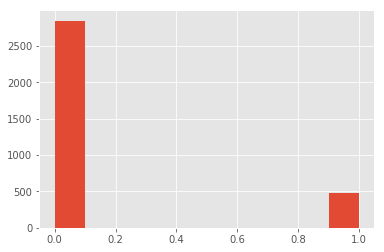

In [8]:
df[target].astype(int).hist();

## 3. Непрерывные переменные 

* Какие возникают проблемы?
* Что нужно сделать, чтобы их пофиксить? 
* На какие картики и описательные статистики можно посмотреть? 

In [9]:
df[var_real].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64
Account length            3333 non-null int64
dtypes: float64(8), int64(7)
memory usage: 390.7 KB


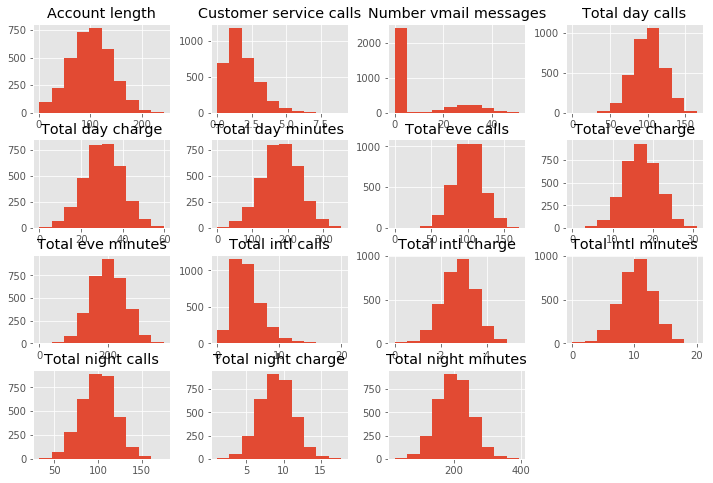

In [10]:
# выбросы
# вторая переменная, хорошо бы срезать нули
df[var_real].hist(figsize=(12,8));

In [11]:
# пропуски
df[var_real].isnull().sum()

Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Account length            0
dtype: int64

In [12]:
df[var_real].describe()

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Account length
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,101.064806
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,39.822106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,74.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,101.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,127.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,243.000000


## 4. Категориальные переменные 

* Какие возникают проблемы? 
* Что нужно сделать, чтобы их пофиксить? 
* На какие кртинки и описательные статистики посмотреть? 

In [13]:
df[var_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 4 columns):
State                 3333 non-null object
Area code             3333 non-null int64
International plan    3333 non-null object
Voice mail plan       3333 non-null object
dtypes: int64(1), object(3)
memory usage: 104.2+ KB


In [14]:
df[var_cat] = df[var_cat].astype('object')

In [15]:
df[var_cat].describe()

,State,Area code,International plan,Voice mail plan
count,3333,3333,3333,3333
unique,51,3,2,2
top,WV,415,No,No
freq,106,1655,3010,2411


In [16]:
states = df['State'].value_counts() 
big_states = states[states >= 65].index

df['State'] = df['State'].apply(lambda w:
                    w if w in big_states else 'another')

In [17]:
df[var_cat].isnull().sum()

State                 0
Area code             0
International plan    0
Voice mail plan       0
dtype: int64

In [18]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_VT,State_WA,State_WI,State_WV,State_WY,State_another,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,1,1,0,1,0


In [19]:
?pd.get_dummies  # для того, чтобы вылезла подсказка

Object `pd.get_dummies  # для того, чтобы вылезла подсказка` not found.


## 5. Новые фичи 

* Как зачем и откуда? 

In [20]:
# новая фича имени Леры
df['Zero vmail messages'] = \
    (df['Number vmail messages'] == 0).astype(int)

## 6. Тестовый период

* Зачем и что будем с ним делать? 

In [21]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2,
                                     stratify=df['Churn'])

# опция stratify делает разбиение на тест и трэйн сбалансированным по Churn

In [22]:
# процент 1 и 0 в выборке
df_train['Churn'].value_counts()/df_train.shape[0]*100

False    85.52138
True     14.47862
Name: Churn, dtype: float64

In [23]:
# процент 1 и 0 в выборке
df_test['Churn'].value_counts()/df_test.shape[0]*100

False    85.457271
True     14.542729
Name: Churn, dtype: float64

In [24]:
# Сохраняем
df_train.to_csv('churn_train.csv', sep='\t', index=False)

df_test.to_csv('churn_test.csv', sep='\t', index=False)

## Почиташки про телеком: 

* [Туториал по pandas](https://habr.com/ru/company/ods/blog/322626/) на телеком-датасете от ODS 
